<a href="https://colab.research.google.com/github/MamatkulovBunyodbek1999/My-portfoilio-samples/blob/main/Mirzo_Ulugbek_District_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science and Artificial Intelligence Practicum

## MODULE 5. Machine Learning.

### Linear Regression

In [56]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.sample(10)

,district,rooms,size,level,max_levels,price
2188,Яккасарайский,4,131.0,7,8,85000.0
5060,Мирабадский,2,60.0,3,4,75000.0
3469,Юнусабадский,2,55.0,2,7,41000.0
1279,Учтепинский,1,32.0,3,4,27000.0
3880,Чиланзарский,3,103.0,4,4,160000.0
7427,Мирзо-Улугбекский,2,65.0,1,9,49000.0
298,Чиланзарский,1,30.0,1,4,26000.0
6206,Учтепинский,2,53.0,4,4,31500.0
5484,Учтепинский,2,47.0,3,4,33000.0
4519,Чиланзарский,1,28.0,2,2,21500.0


# Definition of columns
- `location` is the address of the house for sale
- `district' - the district where the house is located
- `rooms' - the number of rooms
- `size' - house area (sq.m)
- `level` - home

In [57]:
df.shape

(7278, 6)

In [60]:
df.drop_duplicates(inplace=True)

In [61]:
df.shape

(6154, 6)

In [62]:
df['district'].value_counts()

Чиланзарский         1323
Мирзо-Улугбекский    1098
Учтепинский           760
Юнусабадский          736
Мирабадский           595
Яккасарайский         501
Яшнободский           425
Шайхантахурский       312
Олмазорский           237
Сергелийский          146
Янгихаётский           13
Бектемирский            8
Name: district, dtype: int64


**For our practice, we will try to predict the price of houses in Mirzo-Ulugbek district**

In [63]:
housing = df[df.district=='Мирзо-Улугбекский']
housing.head()

,district,rooms,size,level,max_levels,price
18,Мирзо-Улугбекский,3,65.0,1,4,32500.0
24,Мирзо-Улугбекский,3,69.0,1,4,49900.0
73,Мирзо-Улугбекский,3,95.0,5,5,50000.0
76,Мирзо-Улугбекский,3,65.0,4,5,41500.0
114,Мирзо-Улугбекский,2,72.0,18,19,55000.0


In [64]:
X = housing['size'].to_numpy()
X

array([65., 69., 95., ..., 50., 85., 18.])

In [65]:
y = housing['price'].to_numpy()
y

array([32500., 49900., 50000., ..., 28000., 90000., 11000.])


**Let's check if there is a linear relationship between price and house area.**

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

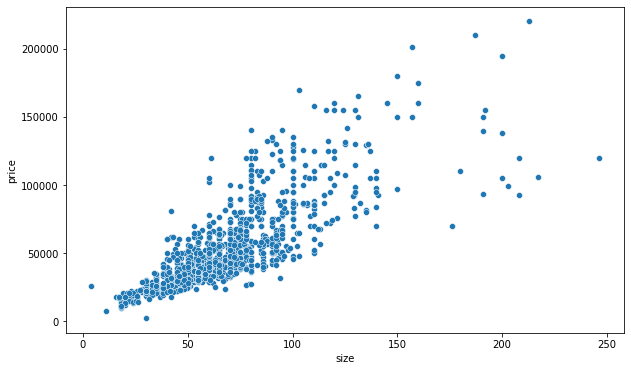

In [67]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

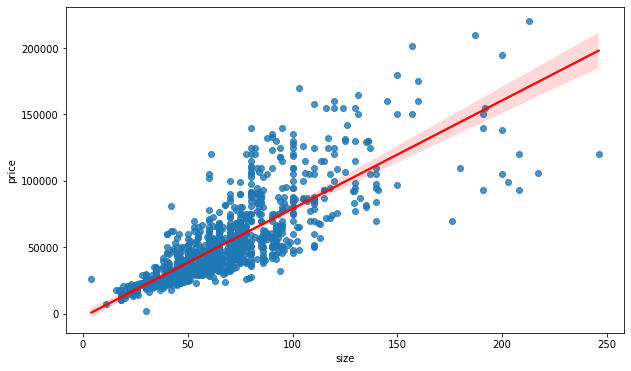

In [68]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color":"red"})
plt.show()

## Task 1
Your task is to calculate the coefficients $\theta_0$ and $\theta_1$ using the following formula from the above variables `X` and `y`.

![Imgur](https://i.imgur.com/zZoXZxI.png)

Here $\tilde{x}$ is the average value for column `X`, $\tilde{y}$ is the average value for column `y`

In [69]:
import numpy as np

Xmean = np.mean(X)
ymean = np.mean(y)

In [70]:
theta1 = sum((X-Xmean)*(y-ymean))/sum((X-Xmean)**2)
print(theta1)

814.7202905725983


In [71]:
theta0 = ymean - theta1*Xmean
print(theta0)

-2394.728660239205



## Task 2
Extract several random values ​​from ``X'' and calculate the corresponding ``y'' using the above coefficients.

![Imgur](https://i.imgur.com/iT5tffj.png)

In [72]:
x_test = housing.sample(10, random_state=42)['size'].to_numpy()
print(x_test)
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(y_test)

[ 54.  38.  60. 116.  60.  67.  48. 100. 135.  55.]
[ 54500.  23000.  35500.  72356.  65000.  38190.  26000. 128000.  82000.
  57000.]


In [73]:
y_predict = theta0 + theta1*x_test
print(y_predict)

[ 41600.16703068  28564.64238152  46488.48877412  92112.82504618
  46488.48877412  52191.53080812  36711.84528725  79077.30039702
 107592.51056706  42414.88732125]


## Task 3

Calculate RMSE (root mean square error), MAE (mean absolute error) between calculated and original values.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

In [74]:
# MAE
MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(MAE)

18153.499934117826


In [75]:
# RMSE
RMSE = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
print(RMSE)

21501.267740833035



# LR using scikit-learn
Now let's do the above steps using scikit-learn.

First of all, we divide the data into train and test.

In [76]:
housing.shape

(1098, 6)

In [77]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

#Linear Regression ML

In [78]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])


LR_model.fit(x_train, y_train)


#We separate the coefficients theta1 and theta0
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (theta1)
print (theta0)

805.6848604269442
-1749.0021372087722


#
#We draw a straight line using the values ​​$\theta_0$ and $\theta_1$

Text(0, 0.5, 'Price')

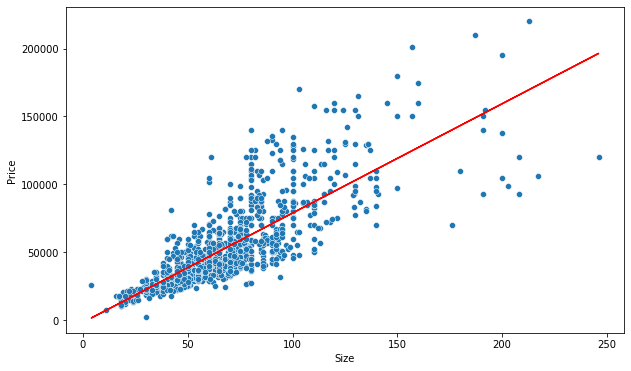

In [79]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("Size")
plt.ylabel("Price")


### Let's evaluate the model

In [80]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [81]:
y_predict = LR_model.predict(x_test)

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(MAE)
print(RMSE)

13988.205383649056
18817.44185753643


#Our LR model is working with MAE=13988
#Our LR model is working with RMSE=18817